In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# Load both datasets
D_data = pd.read_csv("dengue_data.csv", index_col=0)
D_metadata = pd.read_csv("dengue_metadata.csv",index_col=0)

In [3]:
# Principal component analysis (PCA)
pca = PCA(n_components=10)
pca.fit(D_data.T)
variance_explained = pca.explained_variance_ratio_
print("Variance explained by each PC:", variance_explained)
print("\nVariance explained by the first two PCs:", sum(variance_explained[:2]))

Variance explained by each PC: [0.21229208 0.08586268 0.06319544 0.0432192  0.03298313 0.02804765
 0.02201765 0.0197681  0.0188738  0.01730437]

Variance explained by the first two PCs: 0.29815476046091305


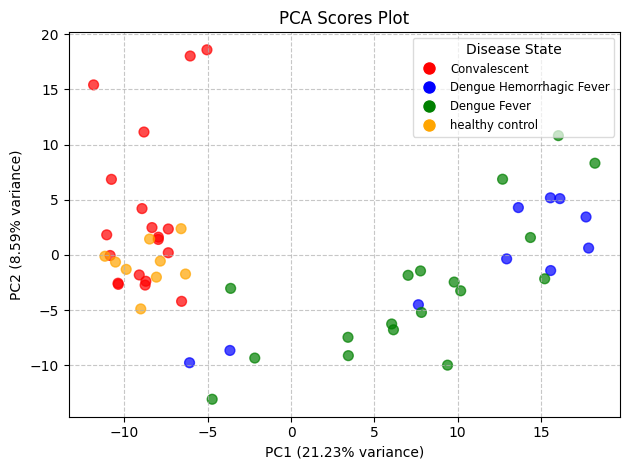

In [4]:
# PCA plot
data_scores = pca.transform(D_data.T)
color_mapping = {'Convalescent': 'red', 'Dengue Hemorrhagic Fever': 'blue','Dengue Fever': 'green', 'healthy control': 'orange'}
colors = D_metadata['disease.state'].map(color_mapping)
scatter = plt.scatter(data_scores[:, 0], data_scores[:, 1], c=colors, s=50, alpha=0.7)
legend_labels = list(color_mapping.keys())
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10, label=label)
    for label in legend_labels
]
plt.legend(handles=legend_handles, title='Disease State', loc='upper right', fontsize='small', framealpha=0.7)
plt.xlabel(f"PC1 ({variance_explained[0] * 100:.2f}% variance)")
plt.ylabel(f"PC2 ({variance_explained[1] * 100:.2f}% variance)")
plt.title("PCA Scores Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()